<img src="images/scipy-la-2022_logo.png" alt="drawing" width="400"/>

![banner](images/banner.png)

### Recursos para enseñar con Jupyter 
#### Fecha: 
####  Sofía Martin, Ariel Ramos, Liliana Hurtado

## Experiencia Práctica
* ¿qué datos me tenemos, cómo los analizamos?
* ¿Es lo mismo que en una planilla de cálculo?

        

## Áreas de aplicación de La Ciencia de Datos
* Investigación
* Indsutria
* servicios
* Salud
* Machine Learning - Inteligencia artificial

Vamos a usar datos del ministerio de salud sobre nacimientos en el país entre 2005 y 2010 para hacer algunas preguntas y obtener una respuesta visual con gráficos

# Qué información podemos obtener:
* El porcentaje de bebés según sexo
* ¿Cuántos nacimientos hay por año en el país?
* ¿Cuántos nacidos vivos hay por año en el país según el grupo etario de la madre?
* ¿Que proporción de madres tuvo hijos antes de los 20?
* Para cada nivel de instrucción/educación, ¿Cuántos nacimientos hubo en cada grupo etario?

Los datos fueron descargados de la página oficial del [Ministerio de salud](http://datos.salud.gob.ar/dataset/nacidos-vivos-registrados-por-jurisdiccion-de-residencia-de-la-madre-republica-argentina-ano-2017/archivo/3c891522-8448-4490-a7da-6deba78d3b32)

¿Qué librería usamos en el cuaderno anterior para graficar?

¿Cómo la importamos?


In [ ]:
import matplotlib.pyplot as grafica

* La librería es: [**matplotlib**](https://matplotlib.org/) (conjunto de módulos)
* el módulo dentro de la librería es: **plot**
* Renombro el módulo para utilizarlo como **grafica**
* [Pandas](https://aprendeconalf.es/docencia/python/manual/pandas/): una herramienta extremadamente versátil y eficiente para procesar estructuras de datos. La importamos?


In [2]:
import pandas as pd

In [3]:
nacimientos = pd.read_csv("Nacimientos_Arg_2005-2010.csv",encoding = "UTF-8")

Conozcamos un poco nuestros datos:

In [4]:
nacimientos.head()

,anio,jurisdiccion_de_residencia_id,jurisdicion_residencia_nombre,edad_madre_grupo_id,edad_madre_grupo,instruccion_madre,semana_gestacion_id,semana_gestacion,intervalo_peso_al_nacer,Sexo,nacimientos_cantidad
0,2005,2,Ciudad Autónoma de Buenos Aires,5,30 a 34,Secundaria/Polimodal Incompleta,4,28 a 31,1500 a 1999,masculino,1
1,2005,2,Ciudad Autónoma de Buenos Aires,5,30 a 34,Primaria/C. EGB Completa,4,28 a 31,500 a 999,masculino,2
2,2005,2,Ciudad Autónoma de Buenos Aires,4,25 a 29,Secundaria/Polimodal Completa,4,28 a 31,1000 a 1499,masculino,6
3,2005,2,Ciudad Autónoma de Buenos Aires,5,30 a 34,Secundaria/Polimodal Incompleta,5,32 a 36,1500 a 1999,masculino,5
4,2005,2,Ciudad Autónoma de Buenos Aires,4,25 a 29,Secundaria/Polimodal Completa,4,28 a 31,1500 a 1999,masculino,1


En las columnas tenemos las caracaterísticas de cada entrada en la tabla, veamos qué información tenemos

In [23]:
nacimientos.columns

Index(['anio', 'jurisdiccion_de_residencia_id',
       'jurisdicion_residencia_nombre', 'edad_madre_grupo_id',
       'edad_madre_grupo', 'instruccion_madre', 'semana_gestacion_id',
       'semana_gestacion', 'intervalo_peso_al_nacer', 'Sexo',
       'nacimientos_cantidad'],
      dtype='object')

In [ ]:
Queremos saber el porcentaje de bebés según sexo

In [24]:
nacimientos['Sexo'].unique()

array(['masculino', 'femenino', 'indeterminado', 'desconocido'],
      dtype=object)

Umm *indeterminado* y *desconocido*, serían lo mismo, reescribamos uno de ellos por el otro

In [25]:
nacimientos_mod = nacimientos.replace(to_replace='indeterminado', value='desconocido')

In [27]:
nacimientos_mod['Sexo'].unique()

array(['masculino', 'femenino', 'desconocido'], dtype=object)

¿Que proporción de madres tuvo hijos antes de los 20?.

> ¿Qué columnas nos van a interesar?

* edad_madre_grupo
* nacimientos_cantidad

Si no estamos seguros qué información contienen las columnas:
* 'edad_madre_grupo_id'
* 'edad_madre_grupo'

> Son similares en el nombre, consultemos el contenido de ambas

In [8]:
nacimientos[['edad_madre_grupo_id', 'edad_madre_grupo']]

,edad_madre_grupo_id,edad_madre_grupo
0,5,30 a 34
1,5,30 a 34
2,4,25 a 29
3,5,30 a 34
4,4,25 a 29
...,...,...
497969,5,30 a 34
497970,5,30 a 34
497971,4,25 a 29
497972,5,30 a 34


Podríamos interesarnos saber cuántos grupos de edades hay

In [9]:
nacimientos['edad_madre_grupo'].unique()

array(['30 a 34', '25 a 29', '20 a 24', '15 a 19', 'Sin especificar',
       '40 a 44', 'De 45 y más', ' Menor de 15', '35 a 39'], dtype=object)

Para no trabajar con todas las columnas que no nos interesan, vamos a quedarnos solamente con las referidas a la consnutla que queremos realizar:
* edad_madre_grupo
* nacimientos_cantidad

In [10]:
nac_may_menor_20 = nacimientos[['edad_madre_grupo','nacimientos_cantidad']]

In [11]:
nac_may_menor_20

,edad_madre_grupo,nacimientos_cantidad
0,30 a 34,1
1,30 a 34,2
2,25 a 29,6
3,30 a 34,5
4,25 a 29,1
...,...,...
497969,30 a 34,1
497970,30 a 34,1
497971,25 a 29,1
497972,30 a 34,1


Y graficamos!!!

<AxesSubplot:ylabel='nacimientos_cantidad'>

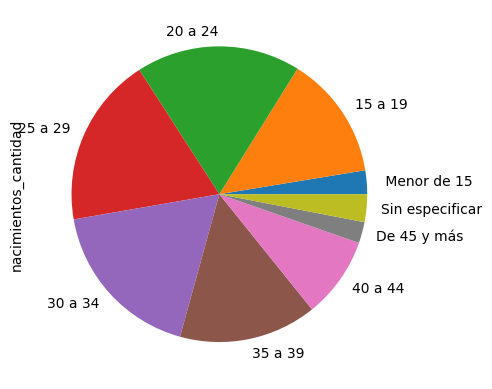

In [19]:
nac_may_menor_20.groupby("edad_madre_grupo")["nacimientos_cantidad"].count().plot(kind='pie')

Pero nos muestra de todos los grupos de edades, veamos como acomodar esto

Luego agrupamos los nacimientos en dos categorías, basado en si cumple o no la condición: Si está en los grupos " Menor de 15" o "15 a 19", ponerlos en un  grupo, sino en otro grupo. (la | es el equivalente a un "o")

In [20]:
nac_madre_separar_20 = nac_may_menor_20.groupby(
                        (nac_may_menor_20.edad_madre_grupo == " Menor de 15") 
                        | (nac_may_menor_20.edad_madre_grupo == "15 a 19"))

¿Que pasó acá?
**Groupby** hizo magia, pero cómo?

In [21]:
nac_sumados = nac_madre_menor_20.sum()
nac_madre_menor_20.head()

,edad_madre_grupo,nacimientos_cantidad
0,30 a 34,1
1,30 a 34,2
2,25 a 29,6
3,30 a 34,5
4,25 a 29,1
21,15 a 19,1
22,15 a 19,2
23,15 a 19,2
24,15 a 19,2
166,15 a 19,61
